In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [4]:
df_train = pd.read_csv('../data/train.csv')
df_train.index = pd.to_datetime(df_train['datetime'])
df_train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,,
2013-11-18,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


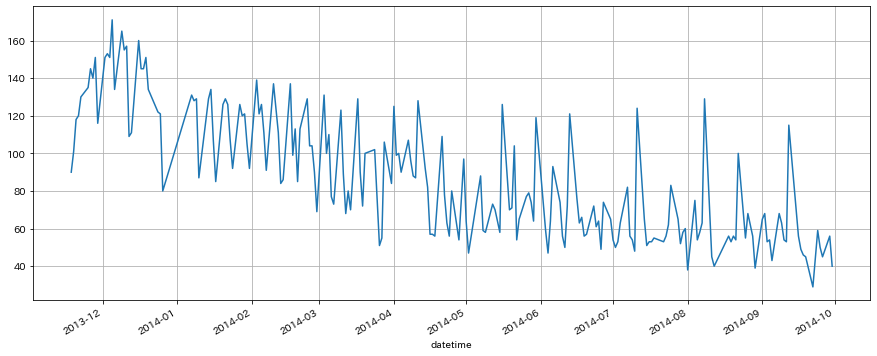

In [7]:
df_train['y'].plot(figsize=(15, 6), grid=True)

In [11]:
res = sm.tsa.seasonal_decompose(df_train['y'], period=5)

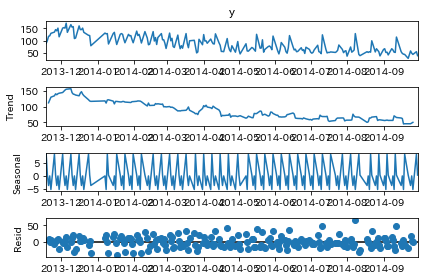

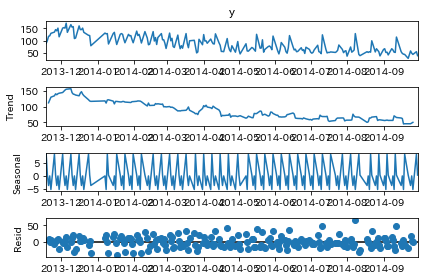

In [12]:
res.plot()

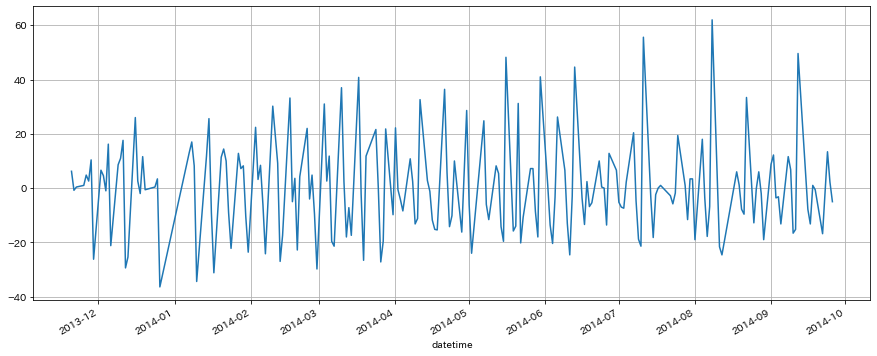

In [15]:
df_train['seasonal'] = df_train['y'] - res.trend
df_train['seasonal'].plot(figsize=(15, 6), grid=True)

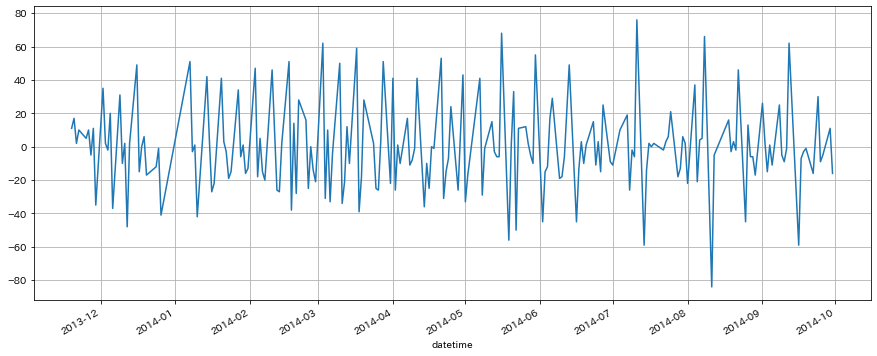

In [19]:
df_train['y'].diff().dropna().plot(figsize=(15, 6), grid=True)

In [20]:
df_train['diff'] = df_train['y'].diff()

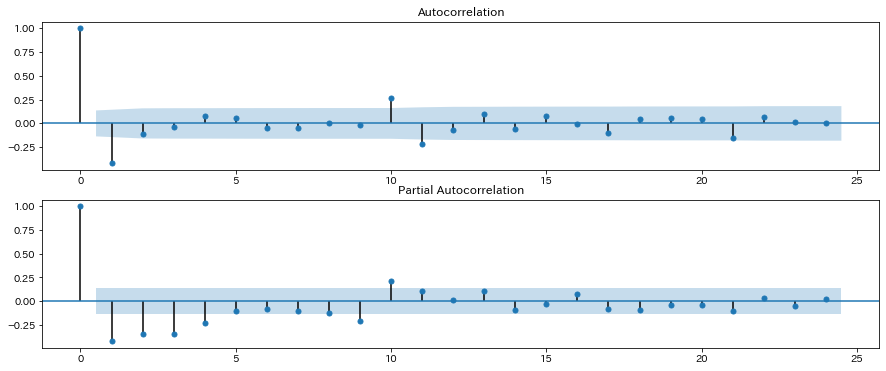

In [23]:
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_train['diff'].dropna(), ax=ax1, )

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_train['diff'].dropna(), ax=ax2)

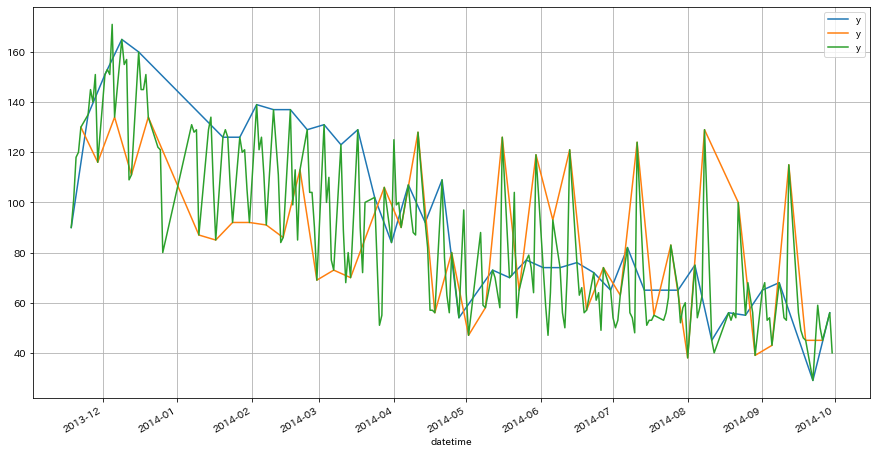

In [33]:
df_train[df_train['week']=='月']['y'].plot(figsize=(15, 8), grid=True)
#df_train[df_train['week']=='火']['y'].plot(figsize=(15, 8), grid=True)
#df_train[df_train['week']=='水']['y'].plot(figsize=(15, 8), grid=True)
#df_train[df_train['week']=='木']['y'].plot(figsize=(15, 8), grid=True)
df_train[df_train['week']=='金']['y'].plot(figsize=(15, 8), grid=True)
df_train['y'].plot(figsize=(15, 8), grid=True)
plt.legend()

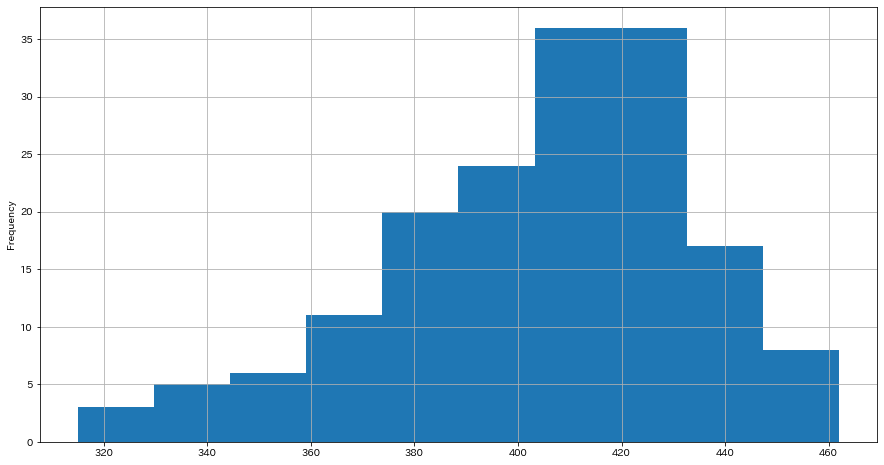

In [37]:
df_train['kcal'].plot(kind='hist', grid=True, figsize=(15, 8))

In [35]:
df_train.isnull().sum()

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
seasonal           4
diff               1
dtype: int64

In [36]:
df_train.shape

(207, 14)

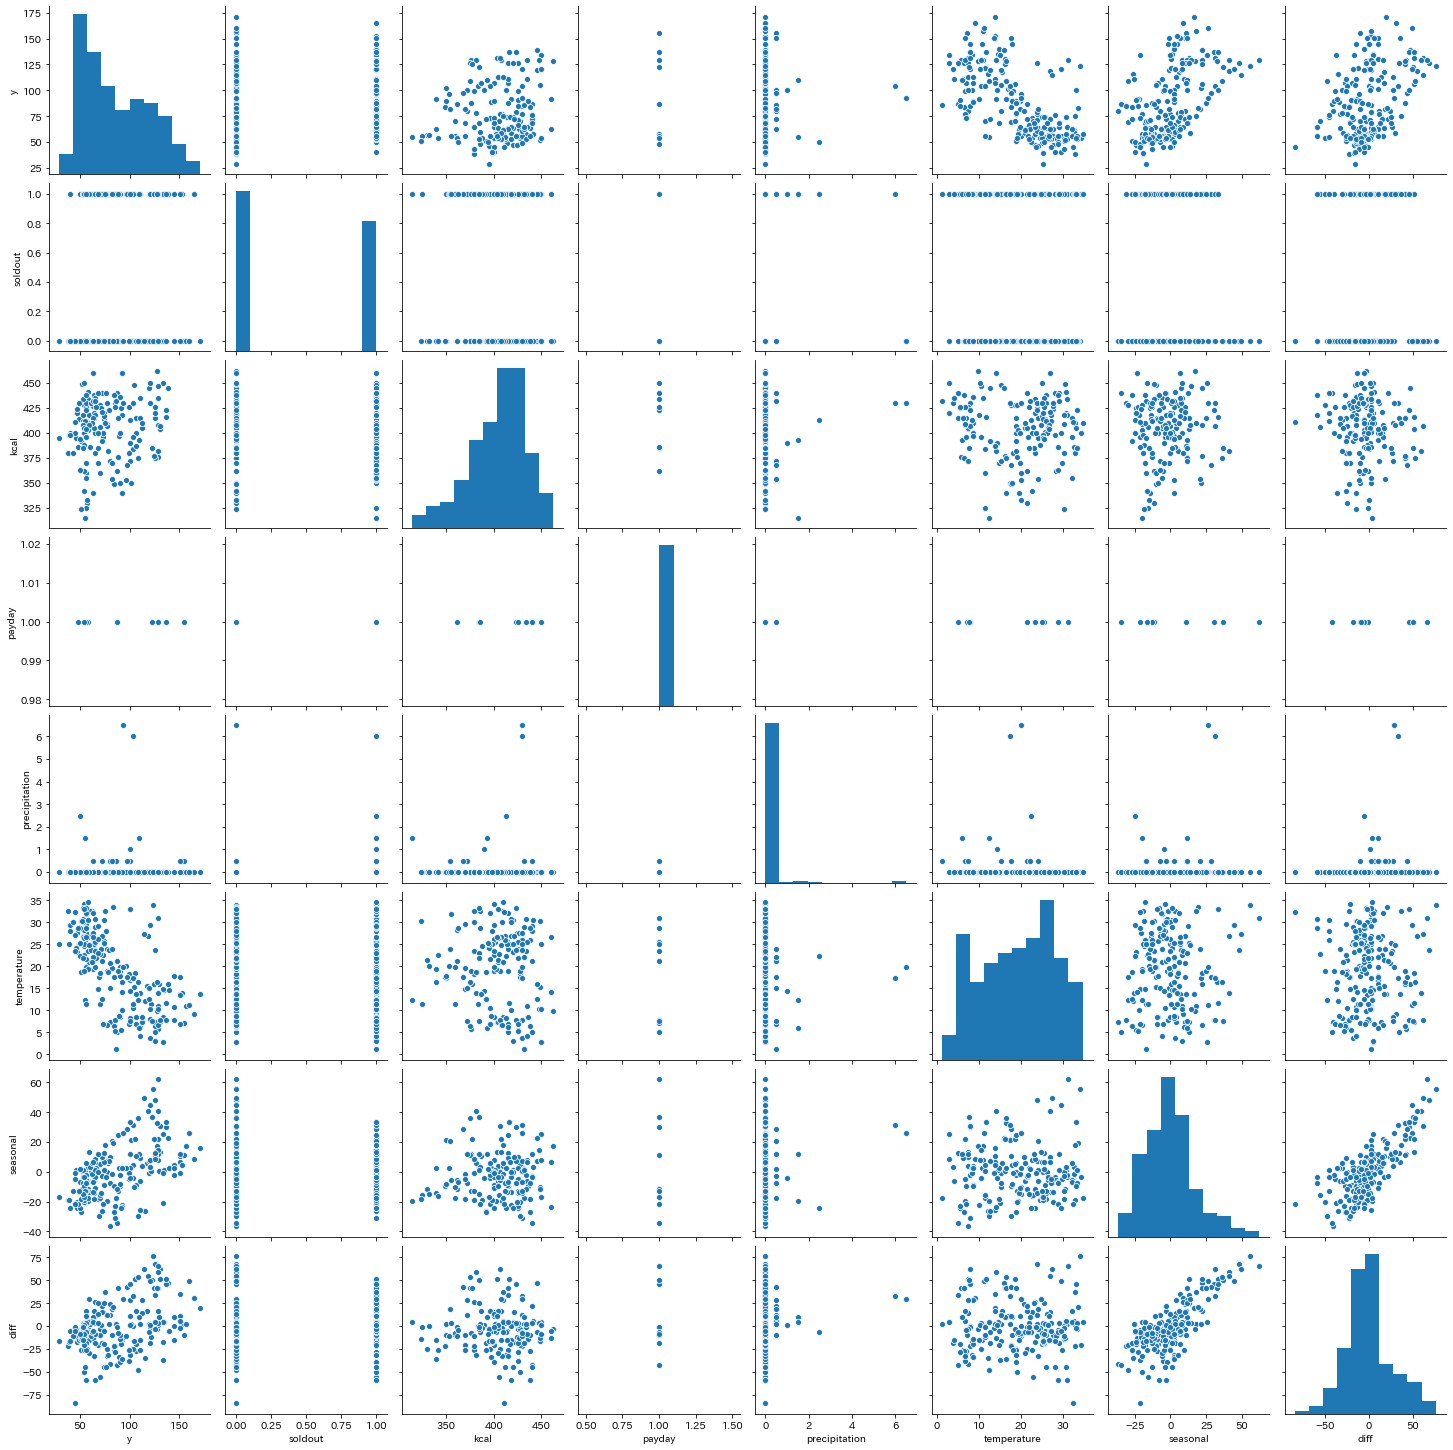

In [45]:
sns.pairplot(df_train)

In [40]:
df_train['precipitation'].unique()

array(['--', '0.5', '0', '1.5', '1', '6', '6.5', '2.5'], dtype=object)

In [43]:
df_train['precipitation'] = df_train['precipitation'].replace('--', 0)
df_train['precipitation'] = df_train['precipitation'].astype(np.float)

In [44]:
df_train['precipitation']

datetime
2013-11-18    0.0
2013-11-19    0.0
2013-11-20    0.0
2013-11-21    0.0
2013-11-22    0.0
             ... 
2014-09-24    0.0
2014-09-25    0.0
2014-09-26    0.0
2014-09-29    0.0
2014-09-30    0.0
Name: precipitation, Length: 207, dtype: float64

In [49]:
df_test = pd.read_csv('../data/test.csv')
df_test.index = pd.to_datetime(df_test['datetime'])
df_test

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2014-10-01,2014-10-1,水,1,メンチカツ,420.0,NaN,NaN,NaN,雨,0,20.2
2014-10-02,2014-10-2,木,0,バーベキューチキン,415.0,NaN,NaN,NaN,曇,--,23.9
2014-10-03,2014-10-3,金,0,豚肉のマスタード焼き,405.0,NaN,NaN,NaN,晴れ,--,28.7
2014-10-06,2014-10-6,月,1,麻婆春雨,400.0,NaN,NaN,NaN,雨,0.5,21.5
2014-10-07,2014-10-7,火,0,厚揚げ肉みそ炒め,430.0,NaN,NaN,NaN,晴れ,--,22.1
2014-10-08,2014-10-8,水,0,完熟トマトのホットカレー,420.0,NaN,NaN,NaN,晴れ,--,23.3
2014-10-09,2014-10-9,木,0,豚キムチ炒め,435.0,NaN,キャリアアップ支援セミナー,NaN,曇,--,22.5
2014-10-10,2014-10-10,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,1.0,薄曇,--,26.1
2014-10-14,2014-10-14,火,0,若鶏梅肉包揚げ,408.0,NaN,NaN,NaN,快晴,--,26.8


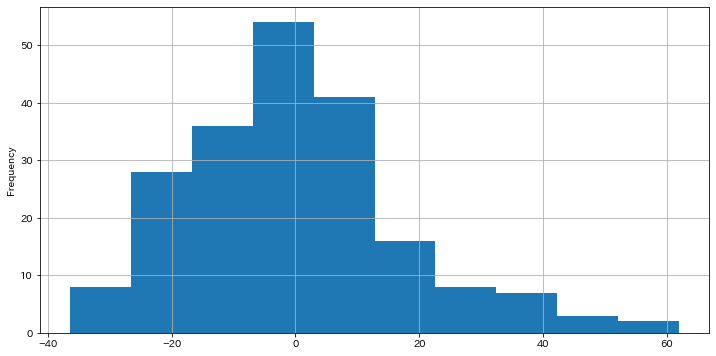

In [50]:
df_train['seasonal'].plot(kind='hist', grid=True, figsize=(12, 6))

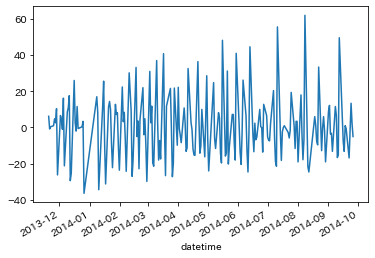

In [51]:
df_train['seasonal'].plot()

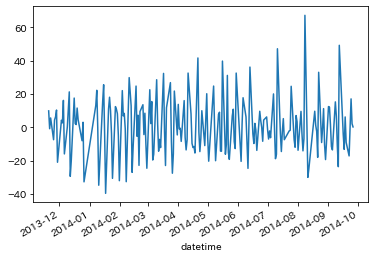

In [53]:
res.resid.plot()